In [16]:
#!sudo apt install -q tesseract-ocr
!pip install -q pytesseract

In [1]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


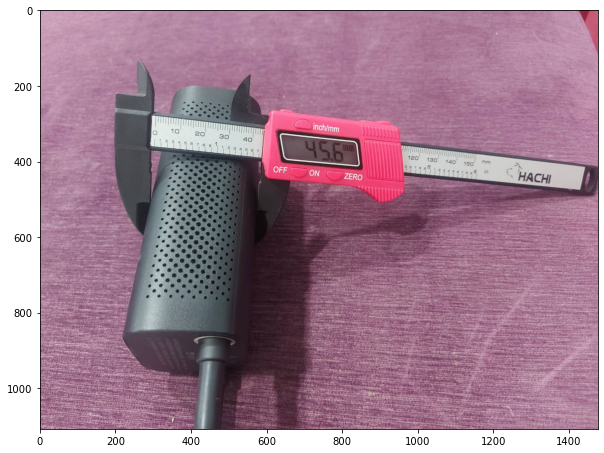

In [2]:
url = "img_vernier/626519.jpg"
img = io.imread(url)
plt.figure(figsize=(10,10))
plt.imshow(img)

Histrogram of LCD Mornitor

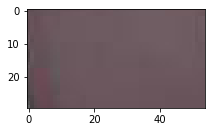

In [3]:
x = img[350:380, 646:700]
x_hsv = cv2.cvtColor(x, cv2.COLOR_RGB2HSV)

plt.subplot(2,1,1)
plt.imshow(x)
plt.subplot(2,1,1)
plt.imshow(x)

(0.0, 120.0)

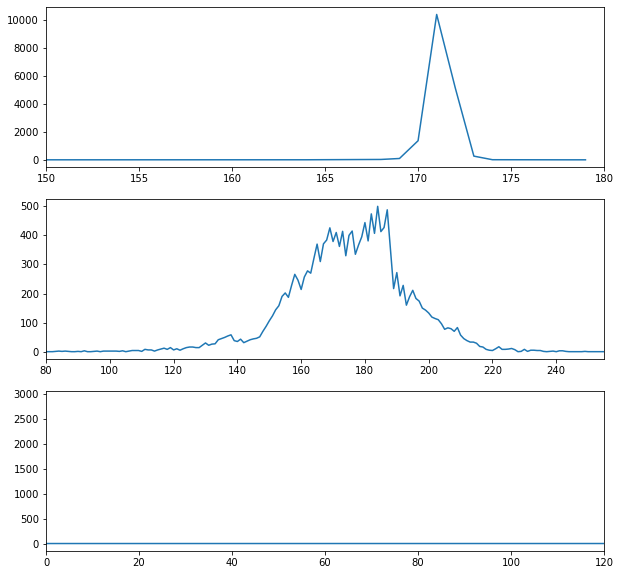

In [84]:
hist0 = cv2.calcHist([x_hsv], [0], mask = None, histSize = [180], ranges = [0, 180])
hist1 = cv2.calcHist([x_hsv], [1], mask = None, histSize = [256], ranges = [0, 256])
hist2 = cv2.calcHist([x_hsv], [2], mask = None, histSize = [256], ranges = [0, 256])

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(hist0)
plt.xlim([150, 180])
plt.subplot(3,1,2)
plt.plot(hist1)
plt.xlim([80, 255])
plt.subplot(3,1,3)
plt.plot(hist2)
plt.xlim([0, 120])

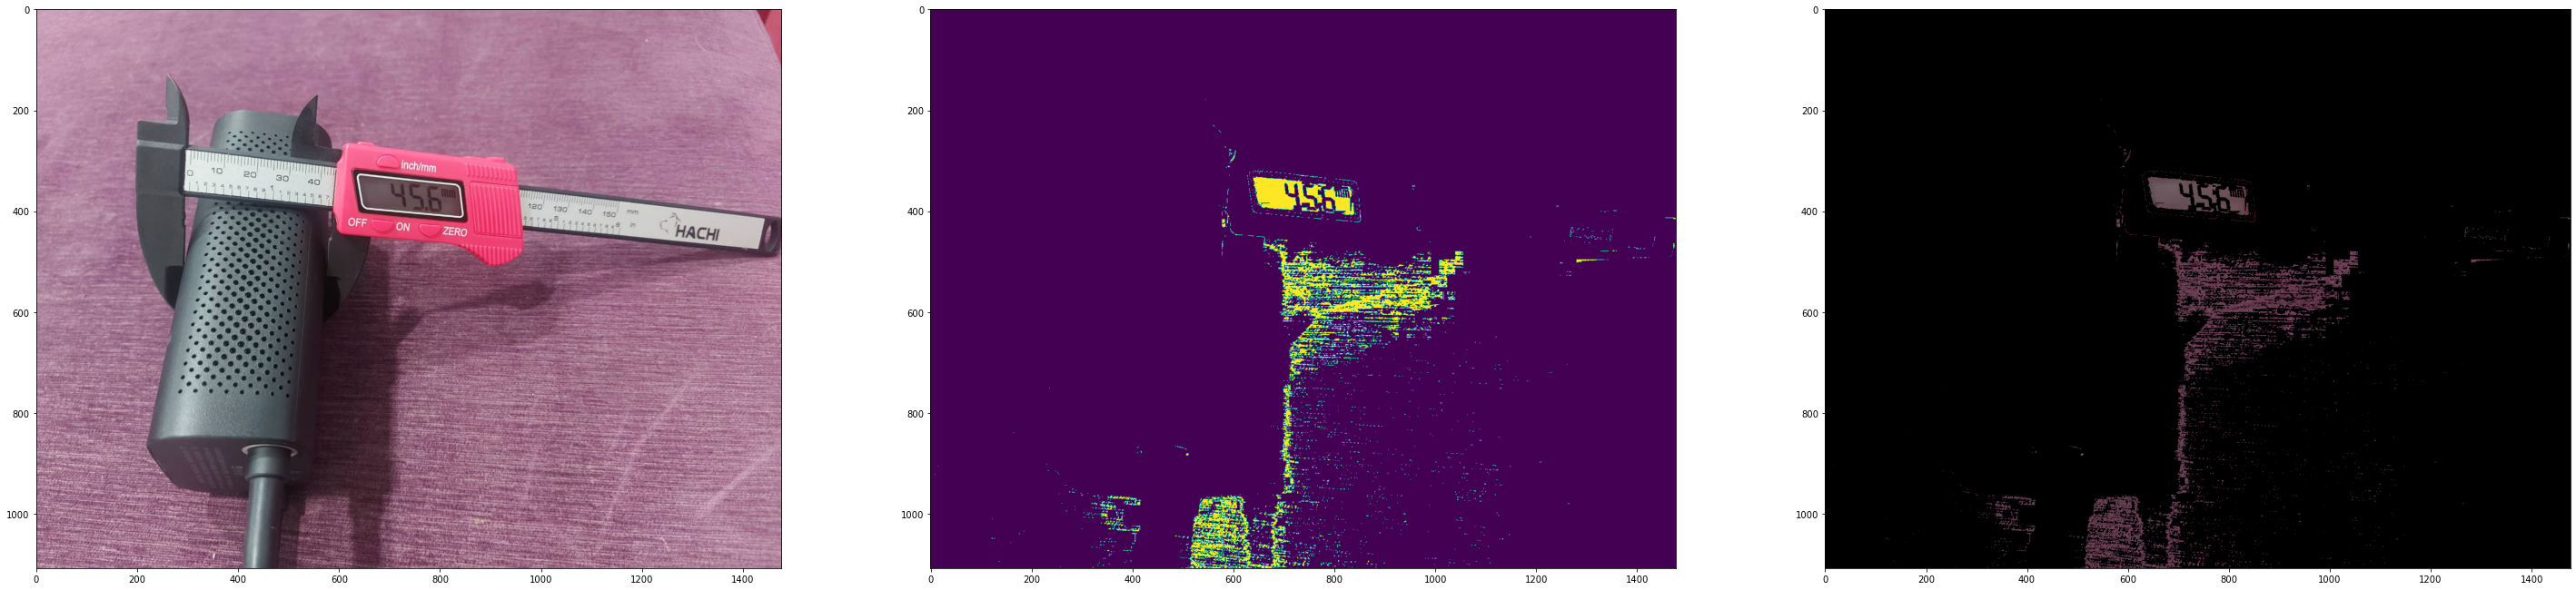

In [85]:
  
# define range of blue color in HSV
low_red = np.array([165, 0, 90], dtype=np.uint8)
high_red = np.array([175, 255,120], dtype=np.uint8)


hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Threshold the HSV image to get only blue colors
masklcd = cv2.inRange(hsv, low_red, high_red)



# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= masklcd)

plt.figure(figsize=(50,50))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(masklcd)
plt.subplot(1,3,3)
plt.imshow(res)

# Find Histogram of Plastics

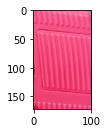

In [86]:
x = img[308:480, 852:953]
x_hsv = cv2.cvtColor(x, cv2.COLOR_RGB2HSV)

plt.subplot(2,1,1)
plt.imshow(x)
plt.subplot(2,1,1)
plt.imshow(x)

(0.0, 255.0)

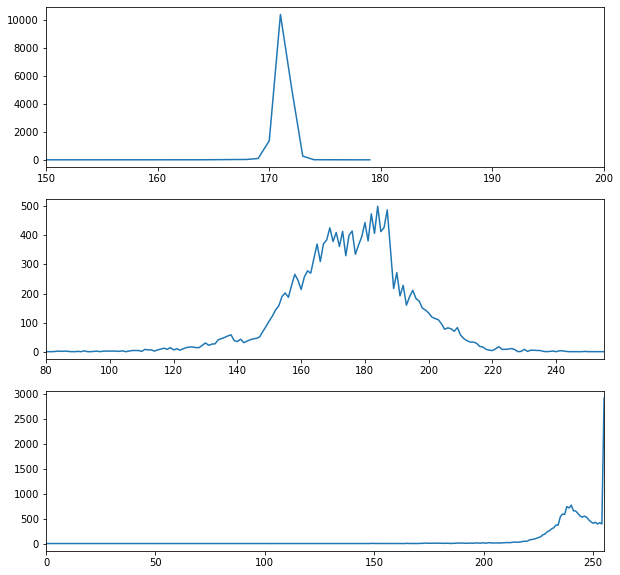

In [87]:
hist0 = cv2.calcHist([x_hsv], [0], mask = None, histSize = [180], ranges = [0, 180])
hist1 = cv2.calcHist([x_hsv], [1], mask = None, histSize = [256], ranges = [0, 256])
hist2 = cv2.calcHist([x_hsv], [2], mask = None, histSize = [256], ranges = [0, 256])

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(hist0)
plt.xlim([150, 200])
plt.subplot(3,1,2)
plt.plot(hist1)
plt.xlim([80, 255])
plt.subplot(3,1,3)
plt.plot(hist2)
plt.xlim([0, 255])


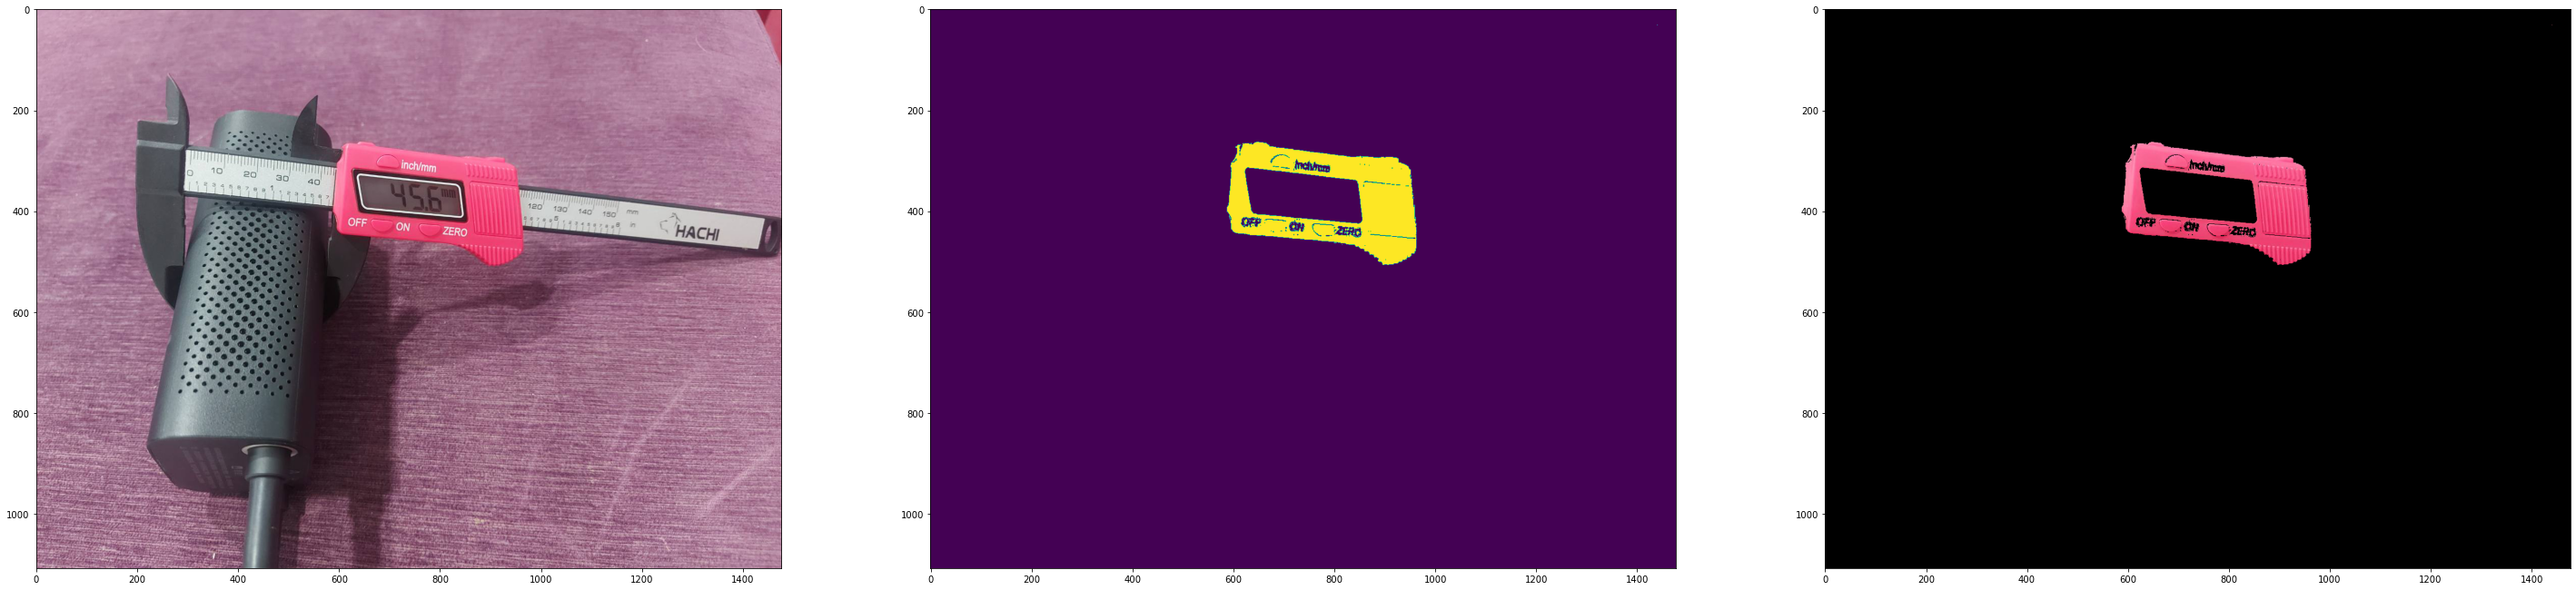

In [88]:
  
# define range of blue color in HSV
low_red = np.array([168, 100, 210], dtype=np.uint8)
high_red = np.array([175, 220,255], dtype=np.uint8)


hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Threshold the HSV image to get only blue colors
maskb = cv2.inRange(hsv, low_red, high_red)


# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= maskb)

plt.figure(figsize=(50,50))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(maskb)
plt.subplot(1,3,3)
plt.imshow(res)

In [89]:
def contours_filtered(contours, min_area=30,min_w=10,min_h=10):
    contours0     = []
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        area = cv2.contourArea(cont)
        if min_area < area and min_w < w and  min_h < h: 
          contours0.append(cont)
    return contours0     

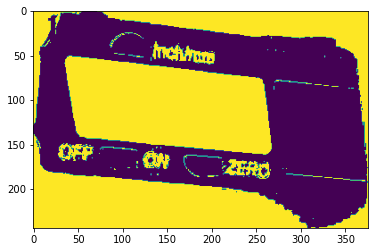

In [90]:

contour,hierarchy = cv2.findContours(maskb,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour          = sorted(contour, key=cv2.contourArea, reverse=False)
contour          = contours_filtered(contour, min_area=30,min_w=50,min_h=50)


x,y,w,h = cv2.boundingRect(contour[0])
mask1    = maskb[y:y+h,x:x+w]
imask1   = cv2.bitwise_not(mask1)
img1     = img[y:y+h,x:x+w]
plt.imshow( imask1)



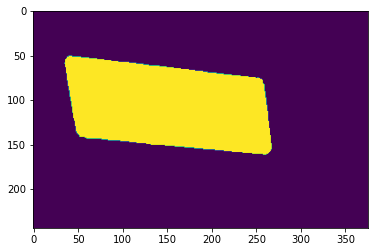

In [91]:
contour,hierarchy = cv2.findContours(imask1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour          = sorted(contour, key=cv2.contourArea, reverse=False)
contour          = contours_filtered(contour, min_area=100,min_w=10,min_h= 10)

x                = cv2.fillPoly(np.zeros_like(imask1), pts =[contour[-1]], color=(1))

plt.imshow(x)

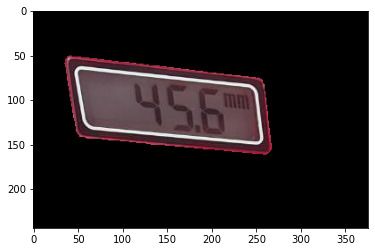

In [92]:
imgy =cv2.bitwise_and(img1,img1,mask=x)
plt.imshow(imgy)

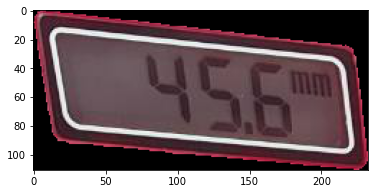

In [96]:
x,y,w,h = cv2.boundingRect(contour[-1])

plt.imshow(imgy[y:y+h,x:x+w]) 

In [95]:
d = pytesseract.image_to_string(int(imgy[y:y+h,x:x+w]))
d

TypeError: only size-1 arrays can be converted to Python scalars